
## Aufgabe 1: Aitken-Neville Interpolation

Interpolieren Sie mithilfe des Verfahrens von Aitken-Neville (s. Blatt 9 Aufgabe (3)) die Funktionen:

(a) $f(x) = \sin(8x^2 + 2)$  
(b) $g(x) = |x|$  
(c) $h(x) = \frac{1}{1 + 100x^2}$

auf dem Intervall $[-1, 1]$ durch Polynome vom Grad $n$. Verwenden Sie als Stützstellen $x_i$ zum einen eine äquidistante Unterteilung des Intervalls und zum anderen Chebyshev-Punkte. Bestimmen Sie die Interpolationspolynome vom Grad $n = 10$ und zeichnen Sie diese beiden Polynome mit zugehörigen Stützstellen sowie die zugrunde liegende Funktion jeweils in einen Plot.



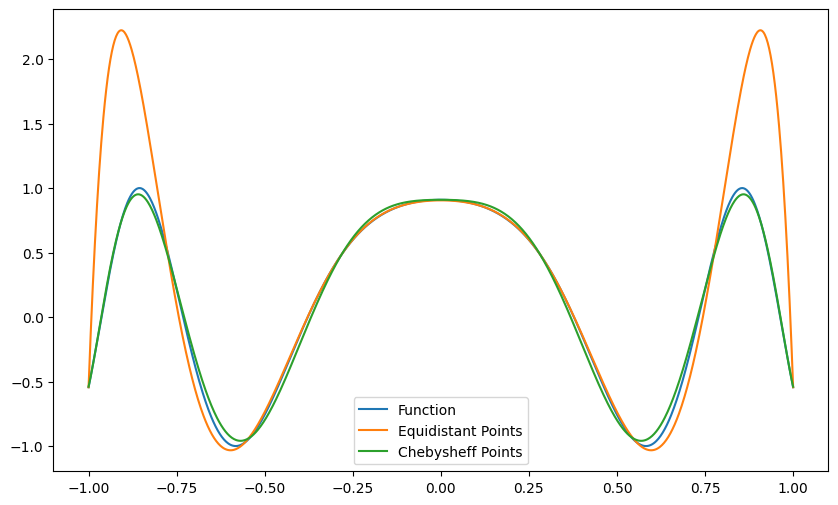

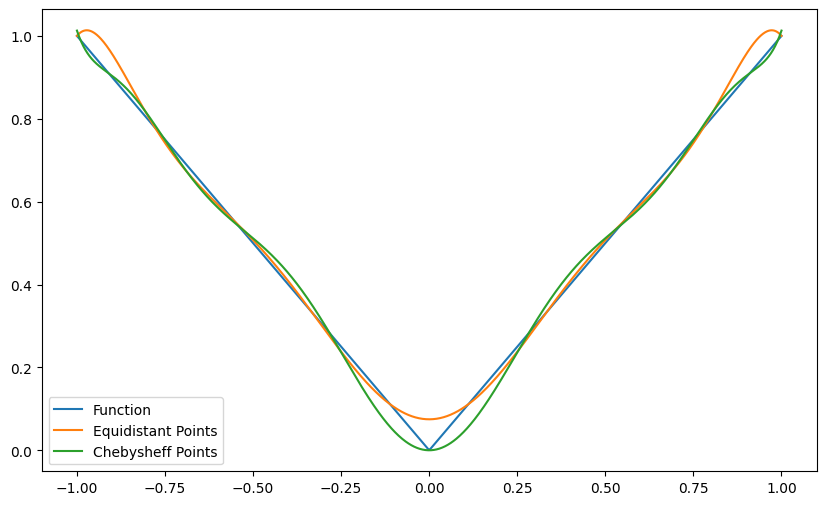

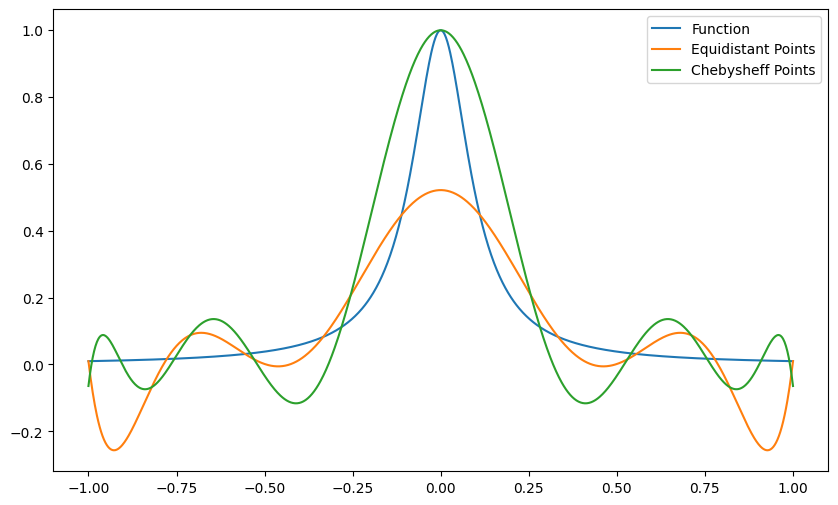

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def aitken_neville(x, y, xs):
    n = len(x)+1
    P = np.copy(y)

    for m in range(1, n):
        for k in range(0, n-m-1):
            P[k] = ((xs-x[k])*P[k+1]-(xs-x[k+m])*P[k])/(x[k+m]-x[k])

    return P[0] # oberster wert des Vektors ist jetzt finales Polynom

def cheby_points(n):  # chebyshev polynom auf [-1, 1]
    return np.cos((2*np.arange(n+1)+ 1)* np.pi / (2*(n+1)))


f = lambda x: np.sin(8*(x**2)+2)
g = lambda x: abs(x)
h = lambda x: 1/(1+100*(x**2))

def plot_aitken_neville(fx, degree, num_eval_points):

    x_equi = np.linspace(-1,1,degree)
    x_cheby = cheby_points(degree) 

    y_equi = fx(x_equi)
    y_cheby = fx(x_cheby)

    eval_points = np.linspace(-1,1, num_eval_points)

    y_points_equi = []
    y_points_cheby = []

    for point in eval_points:
        y_points_equi.append(aitken_neville(x_equi, y_equi, point))
        y_points_cheby.append(aitken_neville(x_cheby, y_cheby, point))

    plt.figure(figsize=(10,6))
    plt.plot(eval_points, fx(eval_points), label = 'Function')
    plt.plot(eval_points, y_points_equi, label = 'Equidistant Points')
    plt.plot(eval_points, y_points_cheby, label = 'Chebysheff Points')
    plt.legend()
    plt.show()

    
plot_aitken_neville(f, 10, 1000)
plot_aitken_neville(g, 10, 1000)
plot_aitken_neville(h, 10, 1000)



## Aufgabe 2: Diskrete Fouriertransformation (DFT)

(a)
Implementieren Sie die diskrete Fouriertransformation (DFT), also berechnen Sie die Fourierkoeffizienten näherungsweise mit der Trapezregel. Testen Sie Ihr Programm an der Funktion aus Aufgabe (5), variieren Sie $N$ und beobachten Sie die Konvergenz:  
$\hat{f}_N(k) \to \hat{f}(k) \quad \text{für } |k| \leq \frac{N}{2}$.

Die Folge $z_k$ der Form:

$$
    z_k=\frac{1}{N}\sum_{l=0}^{N-1}y_l e^{-ikx_l}
$$

heißt diskrete Fourier Transformation (DFT). Dies entspricht gerade dem Skalarprodukt der Vektoren $y$ und $e^{-ikx_l}$.



(b)
Erweitern Sie Ihr Programm durch die Berechnung des trigonometrischen Interpolationspolynoms, unter Verwendung der zuvor berechneten DFT. Testen Sie Ihr Programm wieder an der Funktion $f$ aus Aufgabe (5) auf dem Intervall $[0, 2\pi]$. Variieren Sie die Anzahl an Stützstellen und bestimmen Sie den Interpolationsfehler.






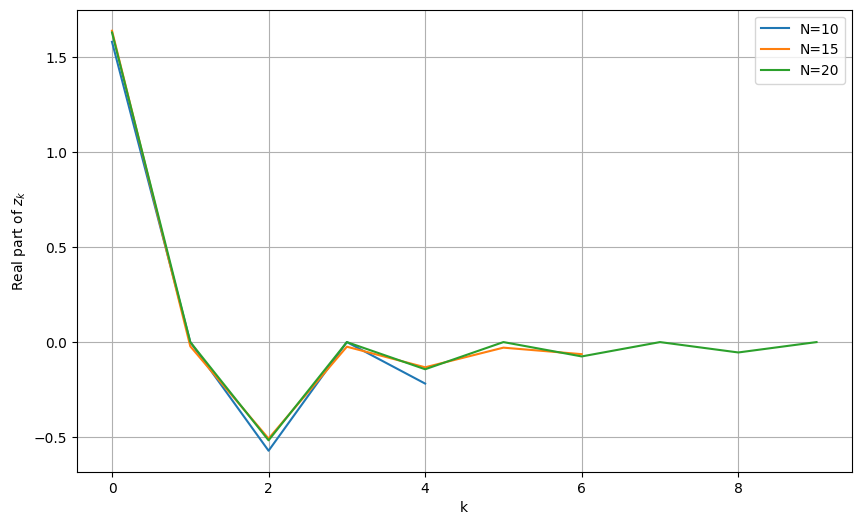

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):           # Vektorisierte Berechnung der Funktion für die Verwendung mit arrays
    # Bedingung 1: 0 <= x <= pi
    cond1 = (0 <= x) & (x <= np.pi)
    # Bedingung 2: pi < x <= 2pi
    cond2 = (np.pi < x) & (x <= 2 * np.pi)
    
    # Berechnung für beide Bedingungen
    result = np.where(cond1, x * (np.pi - x),
                      np.where(cond2, (x - 2 * np.pi) * (np.pi - x), 
                               np.nan))  # Werte außerhalb des Intervalls mit NaN füllen
    return result


def DFT_N(fx, N):
    l = np.arange(N)
    xl = np.linspace(0,2*np.pi,N, endpoint = False)
    k_vals = np.arange(N/2 if N%2==0 else (N-1)/2) # da k element aus Z und kleiner gleich N/2
    
    z_vals = []

    for k in k_vals:            # z_k für diverse k berechnen
        exp = np.exp(-2j*k*l*np.pi/N)
        y = fx(xl)
        zk = (1/N)*np.dot(y,exp)
        z_vals.append(zk)
    return np.array(z_vals), k_vals

# nun für diverse N plotten

plt.figure(figsize = (10,6))
for N in [ 10, 15, 20]:

    z_vals, k_vals = DFT_N(f, N)

    plt.plot(k_vals, z_vals.real, label = f'N={N}')

    plt.plot()

plt.xlabel('k')
plt.ylabel(r'Real part of $z_k$')
plt.grid(True)
plt.legend()
plt.show()


## Aufgabe 3: Signalrekonstruktion

Gegeben sei das Signal:
$y(t) := \sin(7t) + 0.5 \sin(5t)$

an 128 äquidistanten Punkten auf dem Intervall $[0, 2\pi]$. Fügen Sie den Messpunkten ein zufälliges Rauschen $\leq 0.75$ hinzu. Versuchen Sie nun, das ursprüngliche Signal zu rekonstruieren, indem Sie das Signal fouriertransformieren (DFT aus Aufgabe (2) oder FFT, evtl. vorgefertigte Routine verwenden, Normierung beachten!) und Fourierkoeffizienten, deren Betrag $\leq 0.125$ ist, auf $0$ setzen. Vergleichen Sie das Ausgangssignal mit dem rekonstruierten Signal.

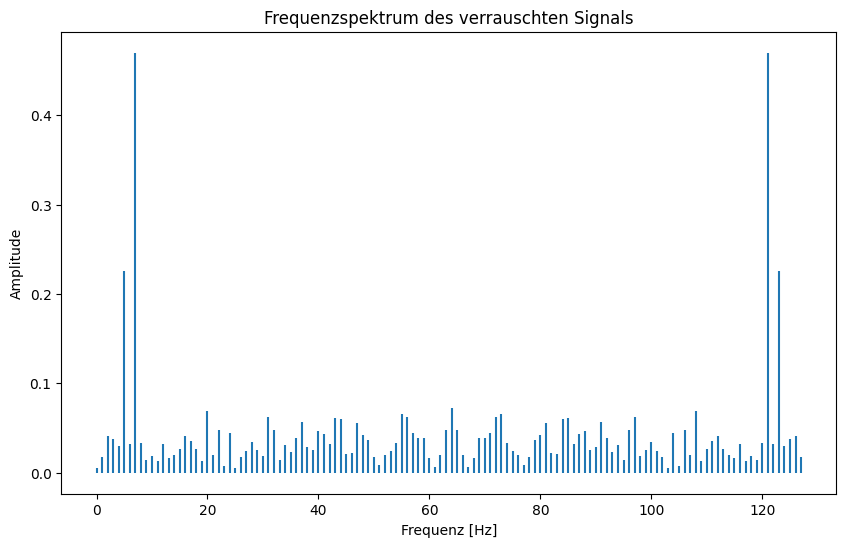

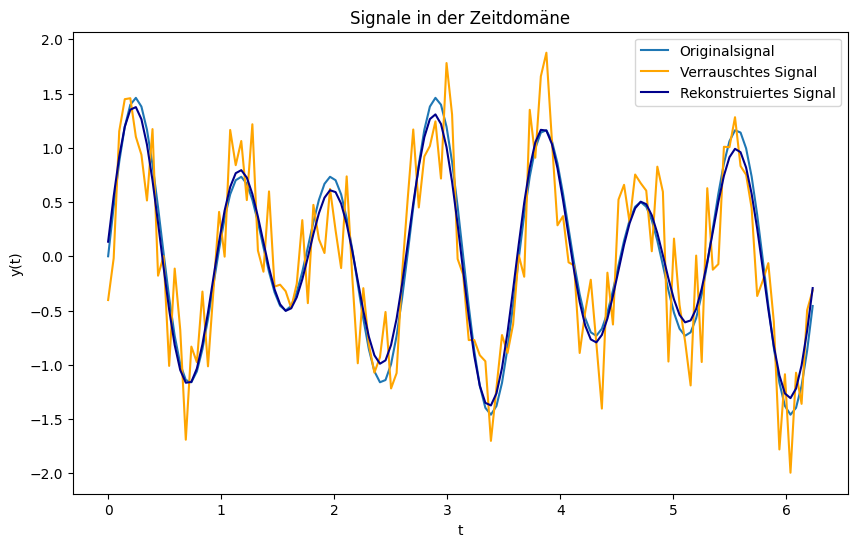

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Benutzerdefinierte DFT-Funktion
def DFT(y):  # Berechnet die diskrete Fourier-Transformation eines Arrays y
    N = len(y)
    l = np.arange(N)
    k = l.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * l / N)
    Y = np.dot(e, y)
    return Y

# Inverse DFT
def IDFT(Y):  # Berechnet die inverse diskrete Fourier-Transformation
    N = len(Y)
    l = np.arange(N)
    k = l.reshape((N, 1))
    e = np.exp(2j * np.pi * k * l / N)
    y = np.dot(e, Y) / N
    return y

# Signal mit Geräusch erstellen. Hierfür wird den richtigen Werten zufällig eine Zahl zwischen 0 und 0.75 hinzuaddiert.

f = lambda t: np.sin(7*t) + 0.5*np.sin(5*t)
t = np.linspace(0, 2*np.pi, 128, endpoint=False)

noise = np.random.uniform(-0.75,0.75,128) # zufällige Zahl 

y_without_noise = f(t)
y_with_noise = y_without_noise+noise


# Fourier-Transformation 
fft_coefficients = DFT(y_with_noise) / len(y_with_noise)  # normieren

# Frequenzen
frequencies = np.arange(len(y_with_noise))

# Frequensspektrum plotten zur visualisierung
plt.figure(figsize=(10,6))
plt.stem(frequencies, np.abs(fft_coefficients), basefmt=" ", markerfmt="")
plt.title("Frequenzspektrum des verrauschten Signals")
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Amplitude")
plt.show()

# Koeffizienten filtern (Schwellenwert: 0.125)
filtered_fft_coefficients = np.where(np.abs(fft_coefficients) > 0.125, fft_coefficients, 0)

# Rücktransformation mit IDFT
reconstructed_signal = IDFT(filtered_fft_coefficients * len(y_with_noise)).real # wieder normierung aufheben zur rücktransformation

# Plot: Originalsignal, verrauschtes Signal, rekonstruiertes Signal
plt.figure(figsize=(10, 6))
plt.plot(t, y_without_noise, label="Originalsignal")
plt.plot(t, y_with_noise, label="Verrauschtes Signal", color="orange")
plt.plot(t, reconstructed_signal, label="Rekonstruiertes Signal", color="darkblue")
plt.title('Signale in der Zeitdomäne')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

